In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

mouse_metadata_path = "CSV_Files/Mouse_metadata.csv"
study_results_path = "CSV_Files/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata
#study_results

In [23]:
combined = pd.merge(study_results,mouse_metadata,  how='left', on='Mouse ID')
#combined.head(10)

In [24]:
mouse_count = combined["Mouse ID"].count()
#mouse_count

1893

In [27]:
duplicate_rows = combined[combined.duplicated(['Mouse ID', 'Timepoint'])]
#duplicate_rows

In [46]:
new_df = combined.drop_duplicates("Mouse ID")
#new_df

In [50]:
combined.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [102]:
mean = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

stats_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
#stats_df

In [105]:
drug_data = pd.DataFrame(combined.groupby(["Drug Regimen"]).count()).reset_index()
#drug_data
drugs_df = drug_data[["Drug Regimen", "Mouse ID"]]
#drugs_df
drugs_df = drugs_df.set_index("Drug Regimen")
#drugs_df

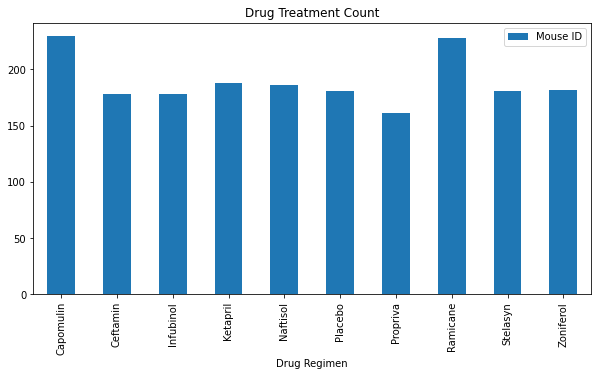

In [110]:
drugs_df.plot(kind="bar", figsize=(10,5))

plt.title("Drug Treatment Count")
plt.show()

In [115]:
drugs = summary_df.index.tolist()
#drug_list

In [121]:
drugs_count = (combined.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
drugs_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

In [126]:
x_axis = np.arange(len(drug_count))
#x_axis

Text(0, 0.5, 'Count')

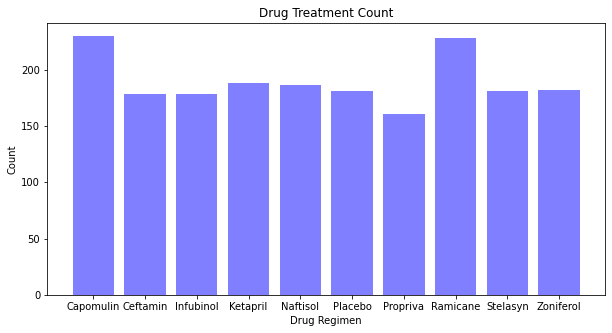

In [129]:
x_axis = drugs

plt.figure(figsize=(10,5))
plt.bar(x_axis, drugs_count, color='b', alpha=0.5, align="center")

plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")